In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve, confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from tabulate import tabulate


# Data load

In [2]:
data = pd.read_csv('Data/data_processed.csv')
print(data.shape)
data

(86546, 36)


,Unnamed: 0,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Mobile_Verified,Var5,Loan_Amount_Submitted,Loan_Tenure_Submitted,Interest_Rate,Processing_Fee,...,Var1_cat_II,Var1_cat_III,Var2_cat_I,Var2_cat_II,Var4_cat_I,Var4_cat_II,Var4_cat_III,Source_cat_I,Source_cat_II,Source_cat_III
0,0,300000.0,5.0,0.0,0,0,5.0,0.0,0.00,0.0,...,0,1,0,1,0,0,1,0,1,0
1,1,200000.0,2.0,0.0,1,13,2.0,2.0,13.25,0.0,...,0,0,0,1,0,1,0,0,1,0
2,2,600000.0,4.0,0.0,1,0,4.0,4.0,0.00,0.0,...,0,1,1,0,0,0,1,0,1,0
3,3,1000000.0,5.0,0.0,1,10,5.0,5.0,0.00,0.0,...,0,1,1,0,0,1,0,0,1,0
4,4,500000.0,2.0,25000.0,1,17,2.0,2.0,0.00,0.0,...,0,1,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86541,87015,1000000.0,5.0,14500.0,0,9,5.0,0.0,0.00,0.0,...,0,1,0,1,0,1,0,0,1,0
86542,87016,0.0,0.0,0.0,1,1,0.0,4.0,35.50,4800.0,...,0,1,0,1,1,0,0,0,1,0
86543,87017,0.0,0.0,0.0,1,8,0.0,4.0,0.00,0.0,...,0,1,0,1,0,1,0,0,1,0
86544,87018,800000.0,5.0,13660.0,1,18,5.0,5.0,0.00,0.0,...,0,1,0,1,0,1,0,0,1,0


In [3]:
del data['Unnamed: 0']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86546 entries, 0 to 86545
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Loan_Amount_Applied    86546 non-null  float64
 1   Loan_Tenure_Applied    86546 non-null  float64
 2   Existing_EMI           86546 non-null  float64
 3   Mobile_Verified        86546 non-null  int64  
 4   Var5                   86546 non-null  int64  
 5   Loan_Amount_Submitted  86546 non-null  float64
 6   Loan_Tenure_Submitted  86546 non-null  float64
 7   Interest_Rate          86546 non-null  float64
 8   Processing_Fee         86546 non-null  float64
 9   EMI_Loan_Submitted     86546 non-null  float64
 10  Filled_Form            86546 non-null  int64  
 11  Disbursed              86546 non-null  int64  
 12  Cty_cat_I              86546 non-null  int64  
 13  Cty_cat_II             86546 non-null  int64  
 14  Cty_cat_III            86546 non-null  int64  
 15  Ct

# Train & test split

Divides the sample into a test and training part. Due to the unbalanced classes, I use the 'stratify' attribute so that the distribution of Y for the two samples are similar. 
Proportion - Disbursed: 0 to Disbursed: 1 is 67/1

In [4]:
y = data['Disbursed'].astype("category")
X = data.drop('Disbursed',axis=1)
print("X.shape: {} y.shape: {}".format(X.shape, y.shape))

X.shape: (86546, 34) y.shape: (86546,)


We will use the feature_names later in the zip function. It will be used to pair with the list. The list of columns will be compared and assigned to the list from BorutaPy, which will identify the appropriate columns. 

In [5]:
feature_names = np.array(X.columns)
feature_names

array(['Loan_Amount_Applied', 'Loan_Tenure_Applied', 'Existing_EMI',
       'Mobile_Verified', 'Var5', 'Loan_Amount_Submitted',
       'Loan_Tenure_Submitted', 'Interest_Rate', 'Processing_Fee',
       'EMI_Loan_Submitted', 'Filled_Form', 'Cty_cat_I', 'Cty_cat_II',
       'Cty_cat_III', 'Cty_cat_IV', 'Cty_cat_V', 'Age', 'Mntly_Incm_log',
       'Employer_cat', 'Male', 'Wb_brwsr', 'Missing_LAA', 'Missing_LTA',
       'Var1_cat_I', 'Var1_cat_II', 'Var1_cat_III', 'Var2_cat_I',
       'Var2_cat_II', 'Var4_cat_I', 'Var4_cat_II', 'Var4_cat_III',
       'Source_cat_I', 'Source_cat_II', 'Source_cat_III'], dtype=object)

In [6]:
#data standardize using Standard Scaler to transform data columns values to certain ranges.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

Divides the sample into a test and training part. Due to the unbalanced classes, I use the 'stratify' attribute so that the distribution of the expense variable for the two samples are similar.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=data["Disbursed"],
                                                    test_size=0.2, random_state=45)

In [8]:
print("y_train.value_counts: \n{} \ny_test.value_counts: \n{}".format(y_train.value_counts(), y_test.value_counts()))

y_train.value_counts: 
0    68219
1     1017
Name: Disbursed, dtype: int64 
y_test.value_counts: 
0    17056
1      254
Name: Disbursed, dtype: int64


## Removing nonsignificant variables using BorutaPy

Boruta is an all-relevant feature selection method. It tries to capture all the important, interesting features you might have in your dataset with respect to an outcome variable. Classifier will be trained on our dataset, such that we get importances for each of our features. Tree ensemble methods such as Random Forest can capture non-linear highly intricate relationships between our predictors.

In [9]:
rf = RandomForestClassifier(n_jobs=-1, class_weight={0: 1, 1: 10}, max_depth=6)

In [10]:
from boruta import BorutaPy

In [11]:
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=48, max_iter=15)

In [12]:
feat_selector.fit(X_train, y_train)

Iteration: 	1 / 15
Confirmed: 	0
Tentative: 	34
Rejected: 	0
Iteration: 	2 / 15
Confirmed: 	0
Tentative: 	34
Rejected: 	0
Iteration: 	3 / 15
Confirmed: 	0
Tentative: 	34
Rejected: 	0
Iteration: 	4 / 15
Confirmed: 	0
Tentative: 	34
Rejected: 	0
Iteration: 	5 / 15
Confirmed: 	0
Tentative: 	34
Rejected: 	0
Iteration: 	6 / 15
Confirmed: 	0
Tentative: 	34
Rejected: 	0
Iteration: 	7 / 15
Confirmed: 	0
Tentative: 	34
Rejected: 	0
Iteration: 	8 / 15
Confirmed: 	11
Tentative: 	6
Rejected: 	17
Iteration: 	9 / 15
Confirmed: 	11
Tentative: 	6
Rejected: 	17
Iteration: 	10 / 15
Confirmed: 	11
Tentative: 	6
Rejected: 	17
Iteration: 	11 / 15
Confirmed: 	11
Tentative: 	6
Rejected: 	17
Iteration: 	12 / 15
Confirmed: 	11
Tentative: 	3
Rejected: 	20
Iteration: 	13 / 15
Confirmed: 	11
Tentative: 	3
Rejected: 	20
Iteration: 	14 / 15
Confirmed: 	11
Tentative: 	3
Rejected: 	20


BorutaPy finished running.

Iteration: 	15 / 15
Confirmed: 	11
Tentative: 	1
Rejected: 	20


BorutaPy(estimator=RandomForestClassifier(class_weight={0: 1, 1: 10},
                                          max_depth=6, n_estimators=88,
                                          n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x223801FA340),
         max_iter=15, n_estimators='auto',
         random_state=RandomState(MT19937) at 0x223801FA340, verbose=2)

In [13]:
X_filtered = feat_selector.transform(X_train)
feature_ranks = list(zip(feature_names, feat_selector.ranking_, feat_selector.support_))

for feat in feature_ranks:
    print('Feature: {:<25} Rank: {:<4}, Keep: {}'.format(feat[0], feat[1], feat[2]))

Feature: Loan_Amount_Applied       Rank: 1   , Keep: True
Feature: Loan_Tenure_Applied       Rank: 3   , Keep: False
Feature: Existing_EMI              Rank: 1   , Keep: True
Feature: Mobile_Verified           Rank: 8   , Keep: False
Feature: Var5                      Rank: 1   , Keep: True
Feature: Loan_Amount_Submitted     Rank: 4   , Keep: False
Feature: Loan_Tenure_Submitted     Rank: 1   , Keep: True
Feature: Interest_Rate             Rank: 1   , Keep: True
Feature: Processing_Fee            Rank: 2   , Keep: False
Feature: EMI_Loan_Submitted        Rank: 1   , Keep: True
Feature: Filled_Form               Rank: 8   , Keep: False
Feature: Cty_cat_I                 Rank: 20  , Keep: False
Feature: Cty_cat_II                Rank: 16  , Keep: False
Feature: Cty_cat_III               Rank: 22  , Keep: False
Feature: Cty_cat_IV                Rank: 21  , Keep: False
Feature: Cty_cat_V                 Rank: 14  , Keep: False
Feature: Age                       Rank: 1   , Keep: True
Feat

In [14]:
X_filtered.shape

(69236, 11)

We use DecisionTreeClassifier to evaluate the importance of the features (feature_importances_) in a importance classification task and compare it to the RandomForestClassifier results.

In [15]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc.feature_importances_[dtc.feature_importances_>0.017]
accuracy_score(y_test, dtc.predict(X_test))

0.9696129404968227

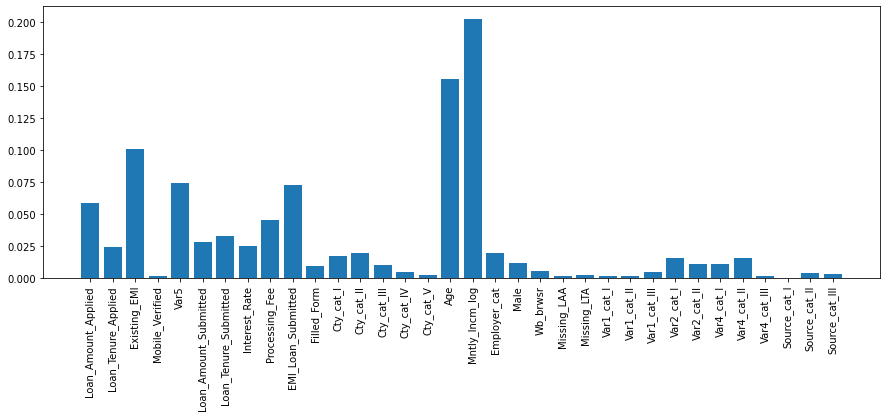

In [16]:
plt.figure(figsize=(15,5))
plt.bar(feature_names, dtc.feature_importances_)
plt.xticks(rotation=90)
plt.show()

As we can see, tree collection methods such as Random Forest and Decision Tree Classifier yield similar results on validity. I decide to stick to the columns previously selected with BorutaPy (X_filtered).

#### Below is a definition of a function that will draw a confusion matrix in a simple form. 

In [17]:
def print_conf(a):
    a_list=a.tolist()
    a_list[0].insert(0,'Real 0')
    a_list[1].insert(0,'Real 1')
    print (tabulate (a_list,headers=['Real/Pred','Pred 0', 'Pred 1']))

## Decision Tree, Random Forest, Logistic Regression

In [18]:
model_1 = DecisionTreeClassifier()
model_1.fit(X_filtered, y_train)
y_pred = model_1.predict_proba(X_filtered)[:,1]
predictions = np.where(y_pred>0.5,1,0)
print_conf(confusion_matrix(y_train, predictions))
print("F1:",f1_score(y_train, predictions))
print( "AUC: ", roc_auc_score(y_score=y_pred,y_true=y_train))

Real/Pred      Pred 0    Pred 1
-----------  --------  --------
Real 0          68219         0
Real 1             44       973
F1: 0.9778894472361809
AUC:  0.9999858097705258


In [19]:
model_2 = RandomForestClassifier()
model_2.fit(X_filtered, y_train)
y_pred = model_2.predict_proba(X_filtered)[:,1]
predictions = np.where(y_pred>0.5,1,0)
print_conf(confusion_matrix(y_train, predictions))
print("F1:",f1_score(y_train, predictions))
print( "AUC: ", roc_auc_score(y_score=y_pred,y_true=y_train))

Real/Pred      Pred 0    Pred 1
-----------  --------  --------
Real 0          68219         0
Real 1             47       970
F1: 0.9763462506290891
AUC:  0.9999779975771534


In [20]:
model_3 = LogisticRegression()
model_3.fit(X_filtered, y_train)
y_pred = model_3.predict_proba(X_filtered)[:,1]
predictions = np.where(y_pred>0.5,1,0)
print_conf(confusion_matrix(y_train, predictions))
print("F1:",f1_score(y_train, predictions))
print( "AUC: ", roc_auc_score(y_score=y_pred,y_true=y_train))

Real/Pred      Pred 0    Pred 1
-----------  --------  --------
Real 0          68212         7
Real 1           1016         1
F1: 0.001951219512195122
AUC:  0.8099223950835763


### Parameters for the above models were adjusted by testing. 
### Below we will apply grid searching to find the best parameters.

There are symptoms of overfitting in tree models. To fix this, we will add a constraint like min_samples_leaf for this particular model.

##### DecisionTreeClassifier

In [41]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
# grid searching key hyperparametres for logistic regression

# define models and parameters
dt_model = DecisionTreeClassifier(min_samples_leaf=2)
criterion = ["gini", "entropy"]
splitter = ["best", "random"]
class_weight = ["{0: 2, 1: 1}","{0: 1, 1: 2}","balanced"]
ccp_alpha = [0.0, 0.01, 0.1]
# define grid search
grid = dict(criterion=criterion,splitter=splitter,class_weight=class_weight,ccp_alpha=ccp_alpha)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=dt_model, param_grid=grid, n_jobs=-1, cv=cv, 
                           scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_filtered, y_train)
# summarize results
print("Accuracy rate of DecisionTreeClassifier: %f using %s" % (grid_result.best_score_, 
                                                                grid_result.best_params_))

Accuracy rate of DecisionTreeClassifier: 0.963280 using {'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'entropy', 'splitter': 'best'}


In [42]:
model_1 = DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='entropy', 
                                 min_samples_leaf=2, splitter='best')
model_1.fit(X_filtered, y_train)
y_pred = model_1.predict_proba(X_filtered)[:,1]
predictions = np.where(y_pred>0.5,1,0)
print_conf(confusion_matrix(y_train, predictions))
print("F1:",f1_score(y_train, predictions))
print( "AUC: ", roc_auc_score(y_score=y_pred,y_true=y_train))

Real/Pred      Pred 0    Pred 1
-----------  --------  --------
Real 0          67581       638
Real 1              0      1017
F1: 0.7612275449101796
AUC:  0.9978975398552666


##### RandomForestClassifier

In [43]:
# define models and parameters
rf_model = RandomForestClassifier(min_samples_leaf=2)
n_estimators = [50, 200]
class_weight = [ "balanced", {0: 1, 1: 2}, {0: 1, 1: 3}]
# define grid search
grid = dict(n_estimators=n_estimators,class_weight=class_weight)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=rf_model, param_grid=grid, n_jobs=-1, cv=cv, 
                           scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_filtered, y_train)
# summarize results
print("Accuracy rate of RandomForestClassifier: %f using %s" % (grid_result.best_score_, 
                                                                grid_result.best_params_))

Accuracy rate of RandomForestClassifier: 0.985253 using {'class_weight': {0: 1, 1: 2}, 'n_estimators': 50}


In [44]:
model_2 = RandomForestClassifier(n_estimators=50, class_weight={0: 1, 1: 2}, criterion = "gini", 
                                 min_samples_leaf=2)
model_2.fit(X_filtered, y_train)
y_pred = model_2.predict_proba(X_filtered)[:,1]
predictions = np.where(y_pred>0.5,1,0)
print_conf(confusion_matrix(y_train, predictions))
print("F1:",f1_score(y_train, predictions))
print( "AUC: ", roc_auc_score(y_score=y_pred,y_true=y_train))

Real/Pred      Pred 0    Pred 1
-----------  --------  --------
Real 0          68218         1
Real 1            797       220
F1: 0.35541195476575116
AUC:  0.9997280794574441


##### LogisticRegression

In [45]:
# define models and parameters
lr_model = LogisticRegression(max_iter=300)
solvers = ['liblinear', 'lbfgs','newton-cg']
penalty=['l2', 'l1']
class_weight = ["{0: 1, 1: 10}","{0: 2, 1: 1}","{0: 1, 1: 2}","balanced"]
c_values = [0.01, 0.001, 0.0001]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values,class_weight=class_weight)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=lr_model, param_grid=grid, n_jobs=-1, cv=cv, 
                           scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_filtered, y_train)
# summarize results
print("Accuracy rate of Logistic Regression: %f using %s" % (grid_result.best_score_, 
                                                             grid_result.best_params_))

Accuracy rate of Logistic Regression: 0.985311 using {'C': 0.0001, 'class_weight': '{0: 1, 1: 10}', 'penalty': 'l2', 'solver': 'lbfgs'}


In [46]:
model_3 = LogisticRegression(C=0.0001, class_weight={0: 1, 1: 10}, penalty='l2', solver='lbfgs', 
                             max_iter=300, n_jobs=12)
model_3.fit(X_filtered, y_train)
y_pred = model_3.predict_proba(X_filtered)[:,1]
predictions = np.where(y_pred>0.5,1,0)
print_conf(confusion_matrix(y_train, predictions))
print("F1:",f1_score(y_train, predictions))
print( "AUC: ", roc_auc_score(y_score=y_pred,y_true=y_train))

Real/Pred      Pred 0    Pred 1
-----------  --------  --------
Real 0          68059       160
Real 1            998        19
F1: 0.03177257525083612
AUC:  0.8117596442355965


#### XGBClassifier

In [47]:
# define models and parameters
xgb_model = XGBClassifier(use_label_encoder=False)
num_parallel_tree = [10, 40]
# define grid search
grid = dict(num_parallel_tree=num_parallel_tree)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=xgb_model, param_grid=grid, n_jobs=-1, cv=cv, 
                           scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_filtered, y_train)
# summarize results
print("Accuracy rate of Logistic Regression: %f using %s" % (grid_result.best_score_, 
                                                             grid_result.best_params_))

[13:50:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy rate of Logistic Regression: 0.985075 using {'num_parallel_tree': 10}


In [48]:
model_4 = XGBClassifier(use_label_encoder=False, n_estimators=100, num_parallel_tree=10)       
model_4.fit(X_filtered, y_train)
y_pred = model_4.predict_proba(X_filtered)[:,1]
predictions = np.where(y_pred>0.5,1,0)
print_conf(confusion_matrix(y_train, predictions))
print("F1:",f1_score(y_train, predictions))
print( "AUC: ", roc_auc_score(y_score=y_pred,y_true=y_train))

[13:50:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Real/Pred      Pred 0    Pred 1
-----------  --------  --------
Real 0          68219         0
Real 1            924        93
F1: 0.16756756756756755
AUC:  0.9616529912203775


#### Final establishing the best cut off threshold in terms of F1 score while using best params in a for loop. The best model will be one with the best F1 score.

In [49]:
models_Params_Tresholds = [DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', 
                                                  criterion='entropy', min_samples_leaf=2, 
                                                  splitter='best'),
                           RandomForestClassifier(n_estimators=50, class_weight={0: 1, 1: 2}, 
                                                  criterion = "gini", min_samples_leaf=2),
                           LogisticRegression(C=0.0001, class_weight={0: 1, 1: 10}, penalty='l2', 
                                              solver='lbfgs', max_iter=300,n_jobs=12),
                           XGBClassifier(use_label_encoder=False, n_estimators=100, num_parallel_tree=10)]
m = ['DecisionTreeClassifier','RandomForestClassifier','LogisticRegression', 'XGBClassifier']
i = 0
for model in models_Params_Tresholds:    
    model.fit(X_filtered, y_train)
    y_pred = model.predict_proba(X_filtered)[:,1]
    r = []
    for x in np.arange(0,1,0.1):
        z = np.where(y_pred > x,1,0)
        f = f1_score(y_train, z)
        r.append(round(f,4))
    print(r)    
    print(m[i], "Best F1:", np.max(r),"threshold:" ,np.argmax(r)*0.1)
    i+=1

[0.7598, 0.7598, 0.7598, 0.7598, 0.7598, 0.7598, 0.7598, 0.7598, 0.7598, 0.7622]
DecisionTreeClassifier Best F1: 0.7622 threshold: 0.9
[0.056, 0.5256, 0.8793, 0.9483, 0.7505, 0.353, 0.0847, 0.0078, 0.0, 0.0]
RandomForestClassifier Best F1: 0.9483 threshold: 0.30000000000000004
[0.029, 0.0597, 0.0931, 0.115, 0.0788, 0.0318, 0.0183, 0.0057, 0.0039, 0.002]
LogisticRegression Best F1: 0.115 threshold: 0.30000000000000004
[13:50:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.029, 0.4768, 0.5033, 0.3824, 0.2596, 0.1676, 0.0973, 0.0517, 0.0098, 0.0]
XGBClassifier Best F1: 0.5033 threshold: 0.2


We will search more broadly around the value of 0.3 threshold.

In [50]:
models_Params_Tresholds = [RandomForestClassifier(n_estimators=50, class_weight={0: 1, 1: 2}, 
                                                  criterion = "gini", min_samples_leaf=2)]

for model in models_Params_Tresholds:    
    model.fit(X_filtered, y_train)
    y_pred = model.predict_proba(X_filtered)[:,1]
    r = []
    for x in np.arange(0.2,0.4,0.01):
        z = np.where(y_pred > x,1,0)
        f = f1_score(y_train, z)
        r.append(round(f,4))
    print(r)    
    print('RandomForestClassifier ', "Best F1:", np.max(r),"threshold:" ,np.argmax(r)*0.01+0.2)

[0.8846, 0.8979, 0.9108, 0.9199, 0.9298, 0.9368, 0.9453, 0.9476, 0.95, 0.9482, 0.9464, 0.9412, 0.9337, 0.9195, 0.9021, 0.8848, 0.8648, 0.8492, 0.8211, 0.7908]
RandomForestClassifier  Best F1: 0.95 threshold: 0.28


In [51]:
print('DecisionTreeClassifier')
threshold = 0.9

model_1 = DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='entropy', 
                                 min_samples_leaf=2, splitter='best')
model_1.fit(X_filtered, y_train)
y_pred = model_1.predict_proba(X_filtered)[:,1]
predictions = np.where(y_pred>threshold,1,0)
print_conf(confusion_matrix(y_train, predictions))
print("F1:",f1_score(y_train, predictions))
print( "AUC: ", roc_auc_score(y_score=y_pred,y_true=y_train))

DecisionTreeClassifier
Real/Pred      Pred 0    Pred 1
-----------  --------  --------
Real 0          67584       635
Real 1              1      1016
F1: 0.7616191904047976
AUC:  0.9978760202893905


In [52]:
print('RandomForestClassifier')
threshold = 0.28

model_2 = RandomForestClassifier(n_estimators=50, class_weight={0: 1, 1: 2},criterion = "gini",
                                 min_samples_leaf=2)
model_2.fit(X_filtered, y_train)
y_pred = model_2.predict_proba(X_filtered)[:,1]
predictions = np.where(y_pred>threshold,1,0)
print_conf(confusion_matrix(y_train, predictions))
print("F1:",f1_score(y_train, predictions))
print( "AUC: ", roc_auc_score(y_score=y_pred,y_true=y_train))

RandomForestClassifier
Real/Pred      Pred 0    Pred 1
-----------  --------  --------
Real 0          68135        84
Real 1             27       990
F1: 0.9469153515064562
AUC:  0.9997593426445743


In [53]:
print('LogisticRegression')
threshold = 0.3

model_3 = LogisticRegression(C=0.0001, class_weight={0: 1, 1: 10}, penalty='l2', solver='lbfgs',
                                              max_iter=300,n_jobs=12)
model_3.fit(X_filtered, y_train)
y_pred = model_3.predict_proba(X_filtered)[:,1]
predictions = np.where(y_pred>threshold,1,0)
print_conf(confusion_matrix(y_train, predictions))
print("F1:",f1_score(y_train, predictions))
print( "AUC: ", roc_auc_score(y_score=y_pred,y_true=y_train))

LogisticRegression
Real/Pred      Pred 0    Pred 1
-----------  --------  --------
Real 0          65399      2820
Real 1            783       234
F1: 0.11495946941783344
AUC:  0.8117596442355965


In [54]:
print('XGBClassifier')
threshold = 0.2

model_4 = XGBClassifier(use_label_encoder=False, n_estimators=100, num_parallel_tree=10)
model_4.fit(X_filtered, y_train)
y_pred = model_4.predict_proba(X_filtered)[:,1]
predictions = np.where(y_pred>threshold,1,0)
print_conf(confusion_matrix(y_train, predictions))
print("F1:",f1_score(y_train, predictions))
print( "AUC: ", roc_auc_score(y_score=y_pred,y_true=y_train))

XGBClassifier
[13:54:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Real/Pred      Pred 0    Pred 1
-----------  --------  --------
Real 0          68112       107
Real 1            639       378
F1: 0.5033288948069241
AUC:  0.9616529912203775


# Test set

In [77]:
print('DecisionTreeClassifier')
threshold = 0.9

model_1 = DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='entropy', 
                                 min_samples_leaf=2, splitter='best')
model_1.fit(X_train, y_train)
y_pred = model_1.predict_proba(X_test)[:,1]
predictions = np.where(y_pred>threshold,1,0)
print_conf(confusion_matrix(y_test, predictions))
print("F1:",f1_score(y_test, predictions))
print( "AUC: ", roc_auc_score(y_score=y_pred,y_true=y_test))

DecisionTreeClassifier
Real/Pred      Pred 0    Pred 1
-----------  --------  --------
Real 0          16678       378
Real 1            239        15
F1: 0.0463678516228748
AUC:  0.5183839755285045


In [78]:
print('RandomForestClassifier')
threshold = 0.2

model_2 = RandomForestClassifier(n_estimators=50, class_weight={0: 1, 1: 2},criterion = "gini",
                                 min_samples_leaf=2)
model_2.fit(X_train, y_train)
y_pred = model_2.predict_proba(X_test)[:,1]
predictions = np.where(y_pred>threshold,1,0)
print_conf(confusion_matrix(y_test, predictions))
print("F1:",f1_score(y_test, predictions))
print( "AUC: ", roc_auc_score(y_score=y_pred,y_true=y_test))

RandomForestClassifier
Real/Pred      Pred 0    Pred 1
-----------  --------  --------
Real 0          16897       159
Real 1            235        19
F1: 0.08796296296296297
AUC:  0.7792466409862464


In [79]:
print('LogisticRegression')
threshold = 0.3

model_3 = LogisticRegression(C=0.0001, class_weight={0: 1, 1: 10}, penalty='l2', solver='lbfgs',
                                              max_iter=300,n_jobs=12)
model_3.fit(X_train, y_train)
y_pred = model_3.predict_proba(X_test)[:,1]
predictions = np.where(y_pred>threshold,1,0)
print_conf(confusion_matrix(y_test, predictions))
print("F1:",f1_score(y_test, predictions))
print( "AUC: ", roc_auc_score(y_score=y_pred,y_true=y_test))

LogisticRegression
Real/Pred      Pred 0    Pred 1
-----------  --------  --------
Real 0          16274       782
Real 1            198        56
F1: 0.10256410256410256
AUC:  0.8016103276284883


In [80]:
print('XGBClassifier')
threshold = 0.2

model_4 = XGBClassifier(use_label_encoder=False, n_estimators=100, num_parallel_tree=10)
model_4.fit(X_train, y_train)
y_pred = model_4.predict_proba(X_test)[:,1]
predictions = np.where(y_pred>threshold,1,0)
print_conf(confusion_matrix(y_test, predictions))
print("F1:",f1_score(y_test, predictions))
print( "AUC: ", roc_auc_score(y_score=y_pred,y_true=y_test))

XGBClassifier
[13:57:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Real/Pred      Pred 0    Pred 1
-----------  --------  --------
Real 0          16969        87
Real 1            245         9
F1: 0.051428571428571435
AUC:  0.8210503427338938


# Summary

As we can see, RandomForestClassifier gives us the best F1 score and the best true positive coefficient with an acceptable error rate. The data was prepared using tree methods. The model was well received with a large number of categorical values dataset. 

RandomForestClassifier(n_estimators=50, class_weight={0: 1, 1: 2},criterion = "gini",
                                 min_samples_leaf=2)

treshold = 0.2

F1: 0.088

AUC:  0.78